In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

rng = numpy.random

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3, 4.4, 5.5, 6.71, 6.93,
                         4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654,
                         9.27, 3.1])
train_Y = numpy.asarray([1.7, 2.76, 2.09, 3.19, 1.694,
                         1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65,2.904, 2.42,
                         2.94, 1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [7]:
# Mean squared error
# reduce_sum()是求和函数，在 tensorflow 里面，计算的都是 tensor，可以通过调整 axis =0,1 的维度来控制求和维度。
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * n_samples)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.115256213 W= 0.35907 b= 0.0139047
Epoch: 0100 cost= 0.110830806 W= 0.352558 b= 0.0607447
Epoch: 0150 cost= 0.106916621 W= 0.346435 b= 0.104799
Epoch: 0200 cost= 0.103454776 W= 0.340675 b= 0.146233
Epoch: 0250 cost= 0.100392886 W= 0.335258 b= 0.185203
Epoch: 0300 cost= 0.097684830 W= 0.330163 b= 0.221855
Epoch: 0350 cost= 0.095289767 W= 0.325371 b= 0.256327
Epoch: 0400 cost= 0.093171492 W= 0.320864 b= 0.28875
Epoch: 0450 cost= 0.091298074 W= 0.316626 b= 0.319243
Epoch: 0500 cost= 0.089641266 W= 0.312639 b= 0.347923
Epoch: 0550 cost= 0.088175960 W= 0.308889 b= 0.374898
Epoch: 0600 cost= 0.086880073 W= 0.305363 b= 0.400268
Epoch: 0650 cost= 0.085734084 W= 0.302046 b= 0.424129
Epoch: 0700 cost= 0.084720641 W= 0.298926 b= 0.446571
Epoch: 0750 cost= 0.083824366 W= 0.295992 b= 0.467679
Epoch: 0800 cost= 0.083031796 W= 0.293232 b= 0.487531
Epoch: 0850 cost= 0.082330942 W= 0.290637 b= 0.506203
Epoch: 0900 cost= 0.081711210 W= 0.288196 b= 0.523763
Epoch: 0950 cost= 0.08116318

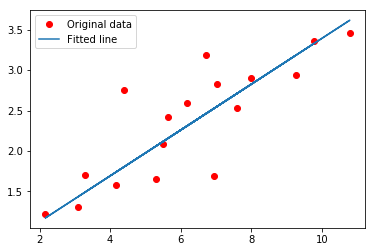

In [9]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()